In [3]:
import numpy as np

raw_data = np.genfromtxt('../data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

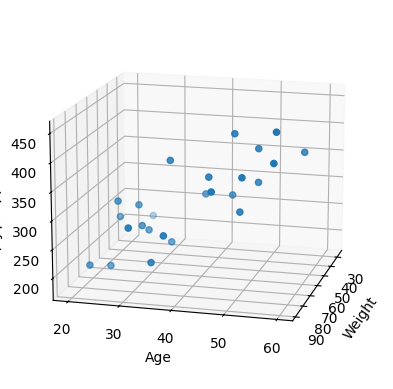

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('blood fat')
ax.view_init(15,15)
plt.show()

In [5]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [11]:
import tensorflow as tf

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,)),
])

model.compile(optimizer='rmsprop', loss='mse')

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 44534.5742
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44392.0547
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 44288.8984
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 44202.6602
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 44126.2109
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 44056.2344
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 43990.8867
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 43929.0195
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 43869.8711
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 43812.8750
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 43757.6484
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 43703.8945
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 43651.3633
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 43599.8789
Epoch 15/5000


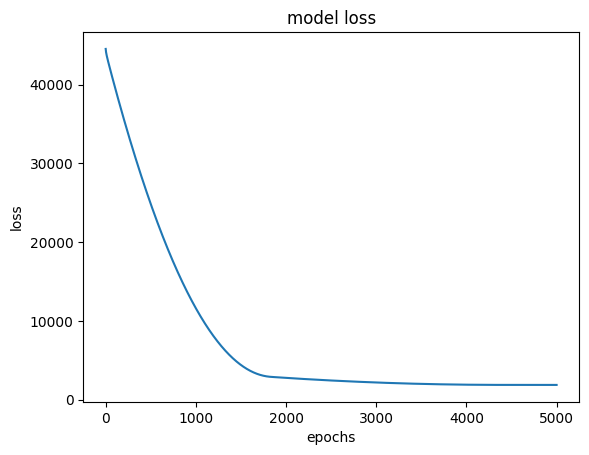

In [22]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [26]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[374.87552]], dtype=float32)

In [27]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[219.11362]], dtype=float32)

In [28]:
W_, b_ = model.get_weights()
print('Weoght is : ', W_)
print('bias is : ', b_)

Weoght is :  [[1.2481974]
 [5.570211 ]]
bias is :  [4.9664946]


In [31]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

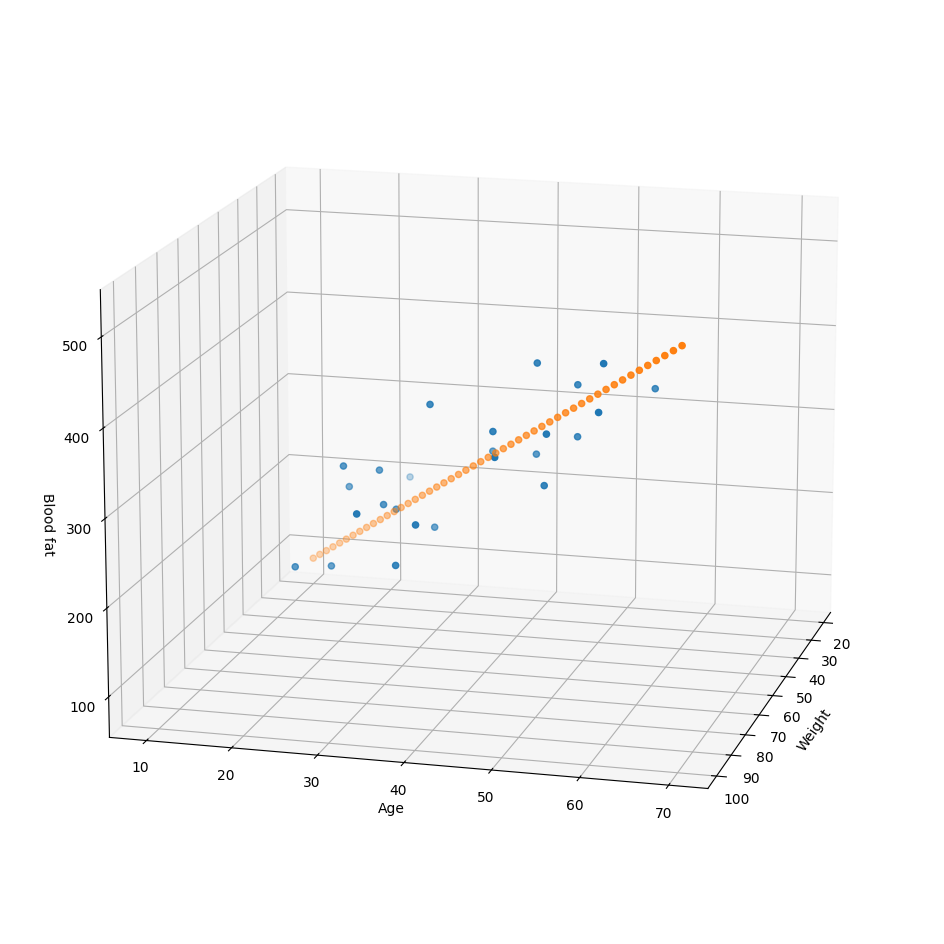

In [32]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()